In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def jrcs_bfs(G):
  visited = []
  Q = []
  T = nx.Graph()
  s = ""
  visited = {}
  for v in list(G.nodes):
    visited[v] = False
  Q.append(0)
  T.add_node(0)
  visited[0] = True
  while(len(Q) > 0):
    print(Q)
    u = Q.pop()
    s += "{}, ".format(u)
    for v in list(G.adj[u]):
      if(visited[v] == False):
        visited[v] = True
        Q.append(v)
        T.add_node(v)
        T.add_edge(u, v)
  print("BFS ordering\n" + s + "\n")
  return T


In [4]:
def jrcs_dfs_simplified(G):
  T = nx.Graph()
  T.add_nodes_from(G)
  V = set(list(G.nodes))
  visited = set()
  _sigma = []
  i = 0
  while (len(V.difference(visited)) > 0):
    v = list(V.difference(visited)).pop()
    if v not in visited:
      _sigma.insert(i,v)
    T, _sigma, visited, i \
    = jrcs_dfs_visit(G, v, T, _sigma, visited, i)


  print("DFS ordering\n" + str(_sigma).strip('[').strip(']') + '\n')
  return T

def jrcs_dfs_visit(G, v, F, sigma, visited, i):
  visited.add(v)
  sigma.insert(i, v)
  i += 1
  for w in G.adj[v]:
    if w not in visited:
      F.add_edge(v, w)
      F, sigma, visited, i \
      = jrcs_dfs_visit(G, w, F, sigma, visited, i)
  return F, sigma, visited, i


In [5]:
def jrcs_tps(G):
    i = len(G.nodes)
    visited = set()
    stack = set()
    V = set(G.nodes)
    #has i as key, vert as value
    _sigma = {}
    while (len(V.difference(visited)) > 0):
        visited, stack, _sigma, i = jrcs_tps_visit(V.difference(visited).pop() /
        visited, G, stacked, _sigma, i)
    
    tps_ordering = ""
    
    for j in range(0, len(_sigma)):
        tps_ordering += str(_sigma[j]) + ", "
    
    return tps_ordering
    
def jrcs_tps_visit(v, G, visited, stack, _sigma, ind_last_found):
    if v not in stack and v not in visited:
        stack.add(v)
        for w in nx.neighbours_out(G, v):
            visited, stack, _sigma, _ind_last_found = \
            jrcs_tps_visit(w, G, visited, stack, _sigma, ind_last_found)
        visited.add(v)
        _sigma[ind_last_found] = v
        ind_last_found -= 1
    return visited, stack, _sigma, _ind_last_found
    
        
        

In [6]:
#input G has to be an undirected, weighted
#graph where all rates are rational numbers
#larger than 0
def jrcs_prim(G):
  T = nx.Graph()
  return T

In [7]:
#input G has to be an undirected, weighted
#graph where all rates are rational numbers
#larger than 0
def jrcs_kruskal(G):
    T = nx.Graph()
    T.add_nodes_from(G)
    weight_list = sorted(list(G.edges), key= lambda edge : edge[2])

    return T

[0]
[2, 3, 4, 24]
[2, 3, 4, 20, 21, 22, 23]
[2, 3, 4, 20, 21, 22]
[2, 3, 4, 20, 21]
[2, 3, 4, 20]
[2, 3, 4, 19]
[2, 3, 4, 15, 16, 17, 18]
[2, 3, 4, 15, 16, 17]
[2, 3, 4, 15, 16]
[2, 3, 4, 15]
[2, 3, 4, 14]
[2, 3, 4, 10, 11, 12, 13]
[2, 3, 4, 10, 11, 12]
[2, 3, 4, 10, 11]
[2, 3, 4, 10]
[2, 3, 4, 9]
[2, 3, 4, 5, 6, 7, 8]
[2, 3, 4, 5, 6, 7]
[2, 3, 4, 5, 6]
[2, 3, 4, 5]
[2, 3, 4]
[2, 3, 1]
[2, 3]
[2]
BFS ordering
0, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 1, 3, 2, 


DFS ordering
24, 20, 22, 21, 23, 19, 15, 17, 16, 18, 14, 10, 12, 11, 13, 9, 5, 7, 6, 8, 4, 0, 2, 1, 3, 24


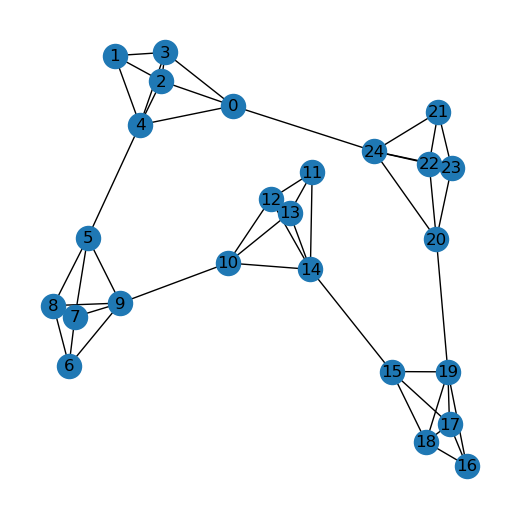

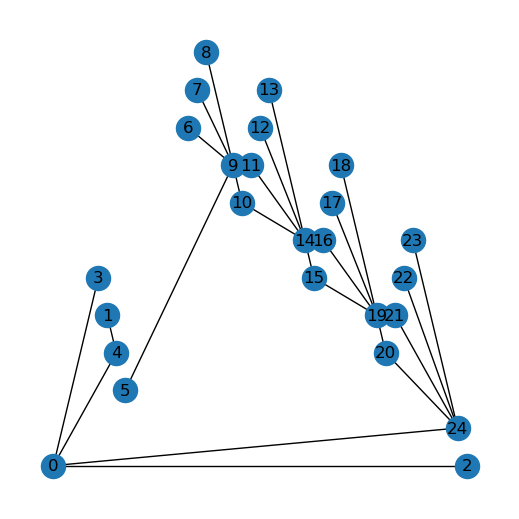

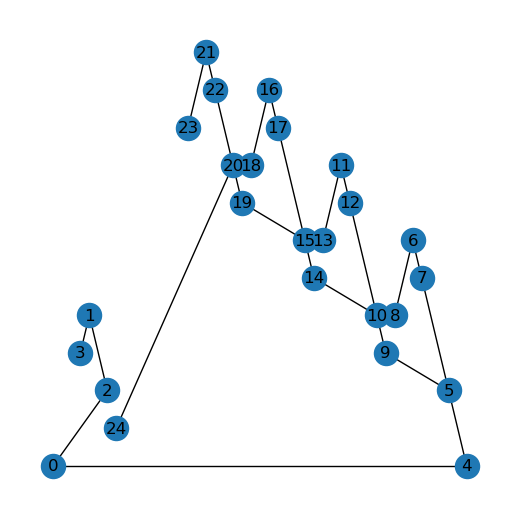

In [8]:
example = nx.connected_caveman_graph(5, 5)
my_fig0 = plt.figure(figsize=(5,5))
nx.draw(example, with_labels=True)

my_fig1 = plt.figure(figsize=(5,5))
nx.draw_planar(jrcs_bfs(example), with_labels=True)
print()
my_fig2 = plt.figure(figsize=(5, 5))
nx.draw_planar(jrcs_dfs_simplified(example), with_labels=True)
